# 개요
+ 기본 통계
  - 평균, 중간값, 분위값, 분산, 표준편차 등
+ 두 데이터셋 사이의 상관관계 분석
  - 공분산(Covariance)
  - 상관계수(Correlation Coefficient)

# 데이터 살펴보기

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

### 히스토그램
+ 데이터 분포 시각화하여 보기

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

<Figure size 640x480 with 1 Axes>

### 간단한 데이터 탐색
+ 데이터 셋의 크기, 최대값, 최솟값 등 기본적인 특징 파악하기
+ 일단 정렬(Sorting)을 해 놓으면 기본 특성을 쉽게 파악할 수 있다
  - 특별한 도구 없이 간단한 파이썬 코드로 해결 가능

In [3]:
num_points = len(num_friends)               # 204

assert num_points == 204


largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

assert largest_value == 100
assert smallest_value == 1

In [4]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49


assert smallest_value == 1
assert second_smallest_value == 1
assert second_largest_value == 49

#  Central Tendency

## 평균(Mean)과 중간값(Median)
* 평균이나 중간값 : 데이터셋의 특징을 설명하는 하나의 지표
* 평균에 속지 말자 (매우 큰 값 또는 매우 작은 값이 큰 영향을 미친다)
  + 중간값을 함께 봐야한다!
  + 예) 가구별 평균소득 vs. 가구별 소득 중간값
    - 나는 중간은 되는 것 같은데, 왜 평균소득보다 한 참 아래일까...?
    - 극강의 부자들 때문에 평균소득이 중간값보다 높다

In [5]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333


assert 7.3333 < mean(num_friends) < 7.3334

# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2


assert median(num_friends) == 6

## 분위값(Quantile)
* 순서대로 정렬된 데이터셋에서 특정 비율에 속하는 경계값
* 예) 1/2 분위값 : 중간값
  + 하위 1/4 분위값 : 하위 25%에 속하는 가장 큰 값(경계값)

In [6]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

## 최빈값(Most Common Values)
* 데이터셋에서 가장 많이 등장하는 값

In [7]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

## 데이터 범위
* 최대값 - 최소값

In [8]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

## Boxplot 시각화
+ 히스토그램보다 더 많은 정보를 제공
+ 최소~최대값, 이상치, 평균, 중간값, 분위값을 한 번에 파악

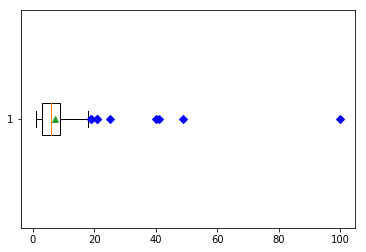

In [9]:
plt.boxplot([num_friends],  0, 'bD', showmeans=True, vert=False)
plt.show()

# Dispersion

## 분산과 표준편차
+ 분산(Variance) : 데이터가 퍼져있는 정도. 분산이 클수록 데이터가 들죽날죽하다는 의미
  - $var(x)=E((X-\mu)^2)$
  - 편차 제곱의 평균
  - 통계적 보정: 평균을 구할 때 샘플 데이터 갯수(n)가 아닌 (n-1)로 나눔
+ 표준편자(Standard Deviation) : 분산의 제곱근 값
  - 분산은 제곱값이기 때문에 값이 크다 &rarr; 분산값을 작게 표현한 것. (실제 편차에 좀 더 가까움)
  - $\sigma_x = \sqrt{var(x)}$

In [10]:
# 'scratch' package가 설치된 디렉토리
import os, sys
os.chdir('..')

from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [11]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

## Interquartile Range (IQR)
+ 사분범위 : 데이터셋의 중간 50%(25%~75%)에 속하는 값들의 퍼진 정도

In [12]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

# 상관관계 (Correlation)
* 두 데이터셋 사이의 관계
* 상관성이 있다 : 서로 영향을 미친다, 증가/감소하는 경향이 서로 관계가 있다.
  + 예) 키가 크면 &rarr; 체중도 더 많이 나가는 경향이 있다
  + 예) 키 vs. 신발 사이즈, 몸무게 vs. 허리 사이즈

In [13]:
# 하루 중 온라인 커뮤니티에서 노는 시간 (예, 페북이나 인스타)
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# 분 --> 시간
daily_hours = [dm / 60 for dm in daily_minutes]

## Covariance (공분산)
+ $cov(X,Y) = E((X-\mu)(Y-\nu))$
  - $X-\mu$ : de_mean(X)
  - $Y-\nu$ : de_mean(Y)
+ $X$의 값이 상승하는 경향을 보일 때, $Y$의 값도 상승하는 경향이 있다면, 공분산의 값은 양수. 반대의 경우는 음수

In [14]:
from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [15]:
print( covariance([1,2,3], [10,20,30]) )
print( covariance([1,2,3], [100,200,300]) )
print( covariance([1,2,3], [3,4,5]) )
print( covariance([1,2,3], [5,4,3]) )

10.0
100.0
1.0
-1.0


## 상관관계(Correlation)
+ Pearson's Correlation Coefficient
+ $\rho={cov(X,Y)\over{\rho_X\rho_y}}$
+ X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1

In [16]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25


In [17]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

## Correlation vs. Covariance
- Pearson's Correlation Coefficient : -1 ~ 1
  + 값이 -1과 1 사이에 고정되기 때문에 Covariance 보다 다루기 좋다
  + 예) 1에 가깝다면 "매우 큰 양의 상관관계"에 있다고 판단할 수 있다
      - Covariance는 100, 200에 대해서도 상대적 비교가 힘들다 ("매우 크다" 또는 "거의 일치한다"라고 판단할 수 없다)
- Covariance : $-\propto$ ~ $\propto$

In [18]:
print( "correlation([1,1,1], [2,2,2])", correlation([1,1,1], [2,2,2]) )
print( "correlation([1,2,3], [10,20,30])", correlation([1,2,3], [10,20,30]) )
print( "correlation([1,2,3], [100,200,300])", correlation([1,2,3], [100,200,300]) )
print( "correlation([1,2,3], [3,4,5])", correlation([1,2,3], [3,4,5]) )
print( "correlation([1,2,3], [5,4,3])", correlation([1,2,3], [5,4,3]) )

print( "covariance([80,90], [90,80])", covariance([80,90], [90,80]) )
print( "correlation([80,90], [90,80])", correlation([80,90], [90,80]) )

print( "covariance([20,10], [90,80])", covariance([20,10], [90,80]) )
print( "correlation([20,10], [90,80])", correlation([20,10], [90,80]) )

correlation([1,1,1], [2,2,2]) 0
correlation([1,2,3], [10,20,30]) 1.0
correlation([1,2,3], [100,200,300]) 1.0
correlation([1,2,3], [3,4,5]) 1.0
correlation([1,2,3], [5,4,3]) -1.0
covariance([80,90], [90,80]) -50.0
correlation([80,90], [90,80]) -0.9999999999999999
covariance([20,10], [90,80]) 50.0
correlation([20,10], [90,80]) 0.9999999999999999


# Numpy
+ 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리
+ 여러 가지 자료구조와 수치 계산을 위한 다양한 기능을 제공 (통계기능 포함)
  - 교재에서 구현한 통계 기능 기본 제공
  - 데이터 분석에 자주 사용되는 필수 라이브러리

In [19]:
import numpy as np
import random as rd

x = [int(rd.gauss(50,10)) for _ in range (200)]
#x = [int(np.random.lognormal(3,.5)) for _ in range (200)]
#np.random.lognormal()

print( np.mean(x) )

print(np.median(x) )

print(np.percentile(x, [10, 50, 68]) )

print(np.var(x) )

print(np.std(x) )

print(np.cov(num_friends, daily_minutes))

print(np.corrcoef(num_friends, daily_minutes))


50.655
50.5
[40.  50.5 56. ]
93.685975
9.679151564057667
[[ 81.54351396  22.42543514]
 [ 22.42543514 100.78589895]]
[[1.         0.24736957]
 [0.24736957 1.        ]]
